## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


In [13]:
#Libraries
import pandas as pd
from matplotlib import pyplot as plt
from ipyleaflet import Map, basemaps, CircleMarker
import random
import matplotlib.colors as colors

#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [14]:
#Read the dataset assets/real_state.csv and try to visualize the table
dataset = pd.read_csv('assets/real_estate.csv', sep=';')

#Delete the Unnamed column
rs_ds = dataset.drop(columns=['Unnamed: 0'])

rs_ds

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [15]:
#What is the most expensive home in the dataset?
most_expensive_home_ds = rs_ds.loc[rs_ds['price'].idxmax()]
most_expensive_home_ds

id_realEstates                                              132042636
isNew                                                           False
realEstate_name                            engel volkers torrelodones
phone_realEstate                                          911798512.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms                                                            19.0
bathrooms                                                         NaN
surface                                                           NaN
price                                                         8500000
date                                             2019-12-19T12:29:00Z
description         El Palacio de El Enebral, la finca fue propied...
address                                                   El Escorial
country                                                        España
level1                                                         Madrid
level2              

#### What is cheapest home in the dataset? (★☆☆)

In [16]:
#What is the most cheapest home in the dataset?
most_cheapest_home_ds = rs_ds.loc[rs_ds['price'].idxmin()]
most_cheapest_home_ds

id_realEstates                                              153637952
isNew                                                           False
realEstate_name                                                esalje
phone_realEstate                                          912786497.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             4.0
bathrooms                                                         4.0
surface                                                         262.0
price                                                               0
date                                      2019-12-28T18:52:25.965658Z
description         ESALJE vende amplio pareado de 268 m2. distrib...
address                                                         Parla
country                                                        España
level1                                                         Madrid
level2              

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [17]:
#What is the biggest home in the dataset
biggest_home_ds = rs_ds.loc[rs_ds[('surface')].idxmax()]
print('The biggest home is:\n', biggest_home_ds)

The biggest home is:
 id_realEstates                                              153936192
isNew                                                           False
realEstate_name                               habitarium inmobiliaria
phone_realEstate                                          916357732.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             3.0
bathrooms                                                         2.0
surface                                                      249000.0
price                                                          289000
date                                             2019-12-25T18:30:00Z
description         Zona Centro. Chalet pareado de esquina de 249m...
address                                              Sevilla la Nueva
country                                                        España
level1                                                         Madri

In [18]:
#What is the biggest and the smallest home in the dataset
smallest_home_ds = rs_ds.loc[rs_ds['surface'].idxmin()]
print('The smallest home is:\n', smallest_home_ds)

The smallest home is:
 id_realEstates                                              152817874
isNew                                                           False
realEstate_name                                              toledo21
phone_realEstate                                          910757382.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             1.0
bathrooms                                                         1.0
surface                                                          15.0
price                                                           85000
date                                     2019-12-28T19:04:44.6433814Z
description         ¡NO BUSQUES MÁS, YA LA HAS ENCONTRADO! . \n \n...
address                                 Calle Amparo,  Madrid Capital
country                                                        España
level1                                                         Madr

#### How many populations (level5) the dataset contains? (★☆☆)

In [19]:
#How many populations (level5) the dataset contains?
level5_populations_ds = rs_ds['level5'].nunique()
print('In level5, there are: ', level5_populations_ds, ' populations')

In level5, there are:  168  populations


#### Does the dataset contain NAs? (★☆☆)


In [20]:
has_nas_ds = rs_ds.isna().any().any()

if has_nas_ds:
    print('The dataset contains NAs.')
else:
    print('The dataset does not contain NAs.')

The dataset contains NAs.


#### Delete the NAs of the dataset, if applicable (★★☆)

In [21]:
#Delete the NAs of the dataset, if applicable
ds_cleaned_columns = rs_ds.dropna(axis=0, how='all')
ds_cleaned = ds_cleaned_columns.dropna(axis=1, how='all')
ds_cleaned

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,0,0,"40,57444","-3,92124"
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [22]:
#What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"?
mean_price_arroyomolinos = ds_cleaned.groupby(['level5'])['price'].mean()
print('The mean price of the population Arroyomolinos (Madrid) is: ', mean_price_arroyomolinos['Arroyomolinos (Madrid)'])

The mean price of the population Arroyomolinos (Madrid) is:  294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

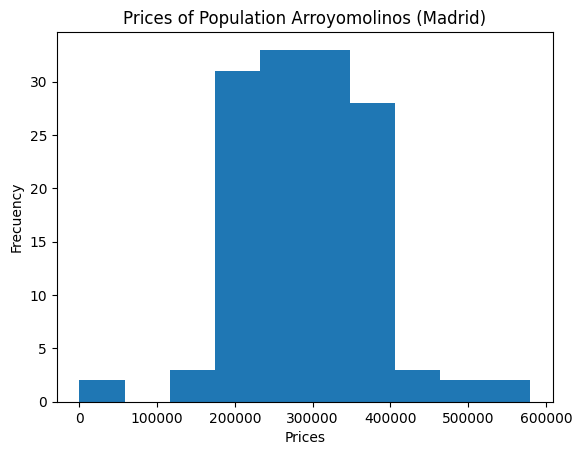

In [23]:
#Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe
group_prices = ds_cleaned.loc[ds_cleaned['level5'] == 'Arroyomolinos (Madrid)']

plt.hist(group_prices['price'], bins=10)
plt.xlabel('Prices')
plt.ylabel('Frecuency')
plt.title('Prices of Population Arroyomolinos (Madrid)')
plt.show()

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [24]:
#Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón"
subset_ds = ds_cleaned[ds_cleaned['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
subset_ds

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
85,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,...,0,0,0,0,0,0,0,1,"40,35059","-3,82693"
94,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,...,0,0,0,0,0,0,0,0,"40,31933","-3,77574"
109,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,...,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,...,0,0,0,0,0,0,0,1,"40,31381","-3,83733"
15291,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,...,0,0,0,0,0,0,0,0,"40,3259051","-3,76318"
15305,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,...,0,0,0,0,0,0,0,0,"40,2882193","-3,8098617"
15322,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,...,0,0,0,0,0,0,0,0,"40,28282","-3,78892"


#### Make a bar plot of the median of prices (★★★) 

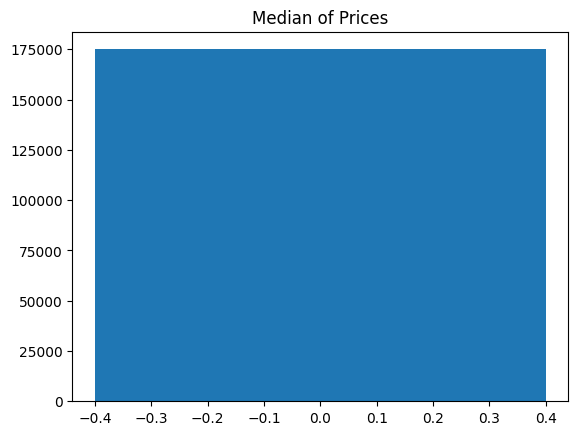

In [25]:
#Make a bar plot of the median of prices
ds_median_prices = subset_ds['price'].median()

plt.bar(0, ds_median_prices)
plt.title('Median of Prices')
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [26]:
#Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms

#mean and variance of prices
prices_mean = ds_cleaned['price'].mean()
prices_variance = ds_cleaned['price'].var()

#mean and variance of rooms
rooms_mean = ds_cleaned['rooms'].mean()
rooms_variance = ds_cleaned['rooms'].var()

#mean and variance of surface area
surface_mean = ds_cleaned['surface'].mean()
surface_variance = ds_cleaned['surface'].var()

#mean and variance of bathrooms
bathrooms_mean = ds_cleaned['bathrooms'].mean()
bathrooms_variance = ds_cleaned['bathrooms'].var()

print('The average home price is: ', prices_mean, 'and the variance is: ', prices_variance)
print('The average number of rooms is: ', rooms_mean, ' with a variance of ', rooms_variance)
print('The average home surface area is: ', surface_mean, ' with a variance of ', surface_variance)
print('The average number of bathrooms is: ', bathrooms_mean, ' with a variance of ', bathrooms_variance)

The average home price is:  477303.56641669385 and the variance is:  349628868677.4539
The average number of rooms is:  3.2316112668535575  with a variance of  1.9407455379492797
The average home surface area is:  196.91643592474264  with a variance of  4764433.8520764755
The average number of bathrooms is:  2.150233488992662  with a variance of  1.669469222949398


#### What is the most expensive home of each population? (★★☆) 

In [27]:
#What is the most expensive home of each population?
most_expensive_homes = subset_ds.loc[subset_ds.groupby(['level5'])['price'].idxmax()]
most_expensive_homes

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
5585,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,2019-12-26T11:01:00Z,...,0,0,0,0,0,0,0,0,"40,3535169","-3,8664683"
11561,153660921,False,unna madrid,912780846.0,https://www.fotocasa.es/es/comprar/vivienda/va...,4.0,3.0,274.0,490000,2019-12-20T10:31:00Z,...,0,0,0,0,0,0,0,1,"40,28286","-3,81475"
2881,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,2019-12-27T15:59:00Z,...,0,0,0,0,0,0,0,0,"40,302820239187","-3,7281704612835"
10412,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,2019-12-21T16:00:00Z,...,0,0,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027"


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

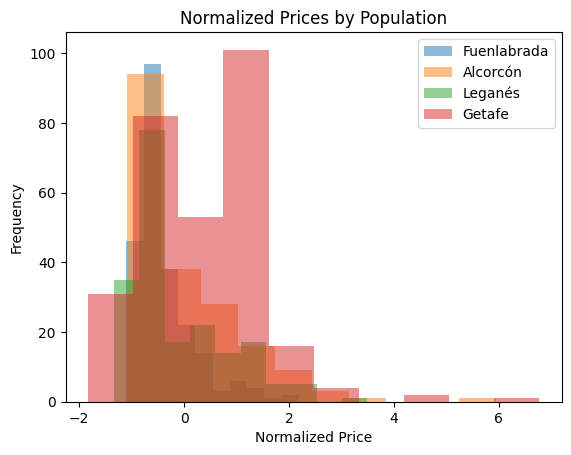

In [28]:
#Normalize the variable of prices for each population 
normalized_subset_prices = subset_ds['price'].transform(lambda x: (x - x.mean()) / x.std())

#plot the 4 histograms in the same plot
populations = subset_ds['level5'].unique()

for population in populations:
    population_prices = normalized_subset_prices[subset_ds['level5'] == population]
    plt.hist(population_prices, bins=10, alpha=0.5, label=population)

plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Normalized Prices by Population')
plt.legend()
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [29]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet
# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [30]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
categories = ds_cleaned['level5'].unique()
num_categories = len(categories)
cmap = plt.get_cmap('plasma', num_categories)

for _, row in ds_cleaned.iterrows():
    latitude = float(row['latitude'].replace(',','.'))
    longitude = float(row['longitude'].replace(',','.'))

    population_category = row['level5']

    category_index = list(categories).index(population_category)

    color = colors.rgb2hex(cmap(category_index))
    
    marker = CircleMarker(location=(latitude, longitude), radius=5, 
                         color=color, fill_color=color, fill_opacity=0.6)
    map.add_layer(marker)

KeyboardInterrupt: 

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

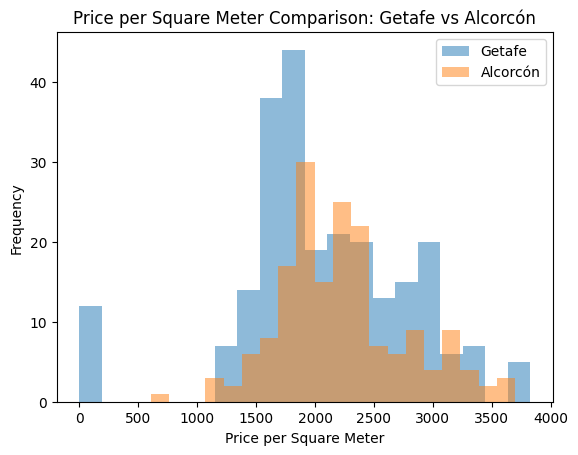

Average price per square meter in Getafe: 2066.314949251463
Average price per square meter in Alcorcón: 2239.302480199618


In [31]:
#What can you say about the price per square meter between the towns of Getafe and Alcorcón?
#Filter data for Getafe and Alcorcón
getafe_data = subset_ds[subset_ds['level5'] == 'Getafe']
alcorcon_data = subset_ds[subset_ds['level5'] == 'Alcorcón']

#Calculate price per square meter
getafe_price_per_sqm = getafe_data['price'] / getafe_data['surface']
alcorcon_price_per_sqm = alcorcon_data['price'] / alcorcon_data['surface']

#Calculate average
getafe_avg_price = getafe_price_per_sqm.mean()
alcorcon_avg_price = alcorcon_price_per_sqm.mean()

#Visualize the data
plt.hist(getafe_price_per_sqm, bins=20, alpha=0.5, label='Getafe')
plt.hist(alcorcon_price_per_sqm, bins=20, alpha=0.5, label='Alcorcón')
plt.xlabel('Price per Square Meter')
plt.ylabel('Frequency')
plt.title('Price per Square Meter Comparison: Getafe vs Alcorcón')
plt.legend()
plt.show()

#Print average price per square meter
print('Average price per square meter in Getafe:', getafe_avg_price)
print('Average price per square meter in Alcorcón:', alcorcon_avg_price)

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [32]:
#Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?
#Filter data for Valdemorillo and Galapagar
valdemorillo_data = subset_ds[subset_ds['level5'] == 'Valdemorillo']
galapagar_data = subset_ds[subset_ds['level5'] == 'Galapagar']

#Calculate average prices
valdemorillo_avg_prices = valdemorillo_data['price'].mean()
galapagar_avg_prices = galapagar_data['price'].mean()

#Compare average prices
if valdemorillo_avg_prices == galapagar_avg_prices:
    print("The average prices in Valdemorillo and Galapagar are the same.")
else:
    print("The average prices in Valdemorillo and Galapagar are different.")

The average prices in Valdemorillo and Galapagar are different.


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [ ]:
#What happens if we do the same analysis for price/m2
#Calculate price per square meter
valdemorillo_price_per_sqm = valdemorillo_data['price'] / valdemorillo_data['surface']
galapagar_price_per_sqm = galapagar_data['price'] / galapagar_data['surface']

#Calculate average prices
valdemorillo_avg_price = valdemorillo_price_per_sqm.mean()
galapagar_avg_price = galapagar_price_per_sqm.mean()

#Compare average prices
if valdemorillo_avg_price == galapagar_avg_price:
    print("The average prices in Valdemorillo and Galapagar are the same.")
else:
    print("The average prices in Valdemorillo and Galapagar are different.")

The average prices in Valdemorillo and Galapagar are different.


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

I could said that there is a relation between surface and prices,
because we can observe on the scattered plot that when the surface increases, there also increase the price


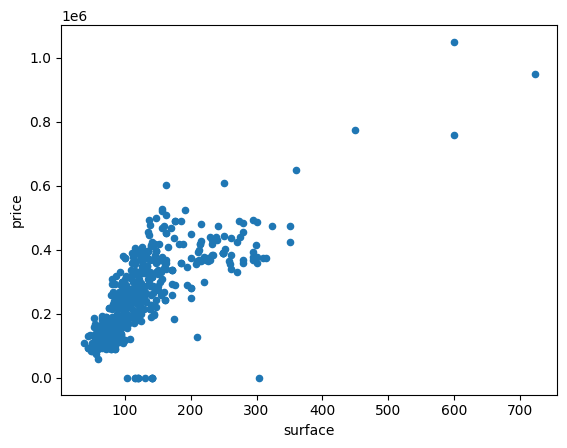

In [ ]:
#Could you say there is a relation between surface and price?
#Scatter plot
subset_ds.plot.scatter(x='surface',y='price')

print('I could said that there is a relation between surface and prices,\nbecause we can observe on the scattered plot that when the surface increases, there also increase the price')

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

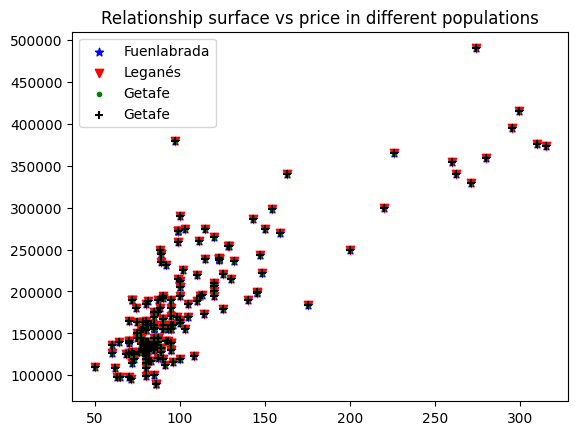

In [ ]:
#Separate the data of the different populations ("Fuenlabrada", "Leganés", "Getafe", "Alcorcón")
fuenlabrada_data = subset_ds[subset_ds['level5'] == 'Fuenlabrada']
fuenlabrada_surface = fuenlabrada_data['surface']
fuenlabrada_price = fuenlabrada_data['price']

leganes_data = subset_ds[subset_ds['level5'] == 'Leganés']
leganes_surface = fuenlabrada_data['surface']
leganes_price = fuenlabrada_data['price']

getafe_data = subset_ds[subset_ds['level5'] == 'Leganés']
getafe_surface = fuenlabrada_data['surface']
getafe_price = fuenlabrada_data['price']

alarcon = subset_ds[subset_ds['level5'] == 'Alarcón']
alarcon_surface = fuenlabrada_data['surface']
alarcon_price = fuenlabrada_data['price']

#Make the scatter plot
plt.scatter(fuenlabrada_surface, fuenlabrada_price, color='blue', marker='*', label='Fuenlabrada')
plt.scatter(leganes_surface, leganes_price, color='red', marker='v', label='Leganés')
plt.scatter(getafe_surface, getafe_price, color='green', marker='.', label='Getafe')
plt.scatter(alarcon_surface, alarcon_price, color='black', marker='+', label='Getafe')

plt.title('Relationship surface vs price in different populations')
plt.legend(loc='best')
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [ ]:
#How many  real estate agencies the dataset contains?
#Count the real estate agencies
real_estate_agencies = ds_cleaned['realEstate_name'].nunique()

#Print the result
print('There are : ', real_estate_agencies, 'Real Estate Agencies')

There are :  1821 Real Estate Agencies


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [ ]:
#Count houses for each population
population_counts = ds_cleaned['level5'].value_counts()

#Find the population with the highest count
most_houses_population = population_counts.idxmax()

#Print the population with the most houses
print("The population with the most houses:", most_houses_population)

The population with the most houses:  Madrid Capital
